In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16

In [5]:
df = pd.read_csv('university-of-california-2016.csv')

/Users/samdixon/miniconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
first = pd.Series([name.split()[0].lower() for name in df['Employee Name']])
first.unique()

array(['james', 'cuonzo', 'daniel', ..., 'xuekai', 'kolone', 'danildon'], dtype=object)

In [7]:
from gender import gender

In [8]:
len(gender.keys())

5177

In [9]:
gender_match = [gender[name.upper()] if name.upper() in gender.keys() else '' for name in first]
gender_match = [gender[0] if isinstance(gender, tuple) else gender for gender in gender_match]

In [10]:
df['gender'] = gender_match

In [11]:
len(df[df['gender'] == ''])/len(df)

0.49695508361927726

In [12]:
df[df['gender']=='']['Employee Name']

1                    Cuonzo Martin
6             Vadiyala Mohan Reddy
14                  Khalil M Tabsh
15             Naveen D Bhandarkar
17                  Abbas Ardehali
18                Dinesh K Chhetri
19                 Ehtisham Mahmud
21                 Jagdeep Bachher
25             Shang I Brian Jiang
36        Gert Diederick Pretorius
43               Praveen Mummaneni
52              Shahryar A Ashouri
59                 Nader Pouratian
68                 Hamid Djalilian
70                Karo Karen Arzoo
75                  C. Benjamin Ma
77                      Hanmin Lee
78            Talmadge E, Jr. King
81                   Alpesh N Amin
85                      Sumit Garg
91            Johnese Maria Spisso
93                  Akira Ishiyama
94                 Sigurd H Berven
97                   Vedat Deviren
99                    Arno J Mundt
100                   Marjan Farid
102                Jasleen Kukreja
106                      Kee D Kim
108               Ai

In [13]:
len(df[df['Employee Name']=='Not provided'])/len(df)

0.37664911503360915

In [14]:
df.to_csv('university-of-california-2016-with-gender.csv')

In [15]:
df.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency', 'Status', 'gender'],
      dtype='object')

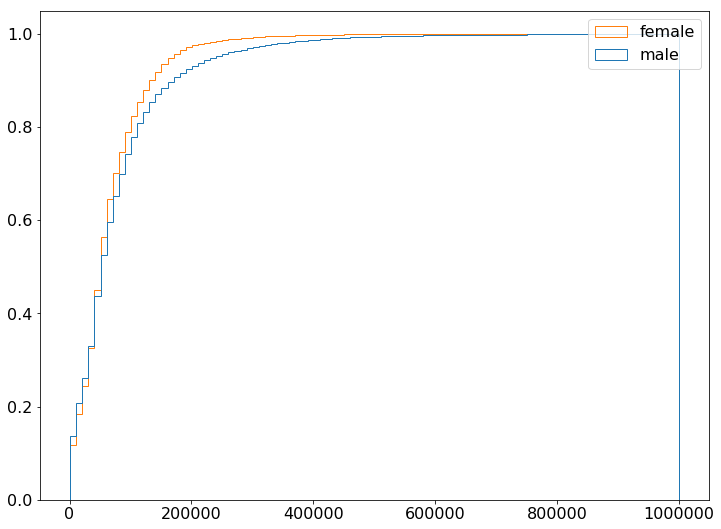

In [16]:
plt.hist([df[df['gender']=='male']['Total Pay'], df[df['gender']=='female']['Total Pay']], histtype='step',
         cumulative=True,
         normed=True, bins=100, range=(1e3, 1e6), label=['male', 'female'])
plt.legend()

In [17]:
profs = df[df['Job Title'].str.contains('PROF')]

In [18]:
profs[(profs['gender'] != '') & (profs['gender'] != 'male') & (profs['gender'] != 'female')]

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status,gender


In [19]:
profs['gender'].unique()

array(['male', '', 'female'], dtype=object)

In [20]:
df.to_csv('university-of-california-2016-with-gender.csv')

In [21]:
profs

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status,gender
5,Ronald W Busuttil,PROF-HCOMP,386375.0,0,2.09583e+06,Not Provided,2482207.0,2482207.0,2016,NaN,University of California,NaN,male
6,Vadiyala Mohan Reddy,ACT PROF-HCOMP,599620.0,0,1.3439e+06,Not Provided,1943521.0,1943521.0,2016,NaN,University of California,NaN,
7,Timothy H Mccalmont,PROF OF CLIN-HCOMP,218517.0,0,1.70842e+06,Not Provided,1926941.0,1926941.0,2016,NaN,University of California,NaN,male
8,Eric Esrailian,HS ASSOC CLIN PROF-HCOMP,155712.0,0,1.68191e+06,Not Provided,1837625.0,1837625.0,2016,NaN,University of California,NaN,male
9,Philip E Leboit,PROF OF CLIN-HCOMP,265025.0,0,1.51443e+06,Not Provided,1779457.0,1779457.0,2016,NaN,University of California,NaN,male
10,Robert N. Weinreb,PROF-HCOMP,551815.0,0,1.07497e+06,Not Provided,1626782.0,1626782.0,2016,NaN,University of California,NaN,male
11,Benjamin J Ansell,HS CLIN PROF-HCOMP,199327.0,0,1.41651e+06,Not Provided,1615837.0,1615837.0,2016,NaN,University of California,NaN,male
12,Gary L Gitnick,PROF-HCOMP,302518.0,0,1.29741e+06,Not Provided,1599932.0,1599932.0,2016,NaN,University of California,NaN,male
13,Michael M. Madani,PROF OF CLIN-HCOMP,241925.0,0,1.33708e+06,Not Provided,1579002.0,1579002.0,2016,NaN,University of California,NaN,male
14,Khalil M Tabsh,HS CLIN PROF-HCOMP,201786.0,0,1.32094e+06,Not Provided,1522723.0,1522723.0,2016,NaN,University of California,NaN,


In [22]:
import seaborn as sns

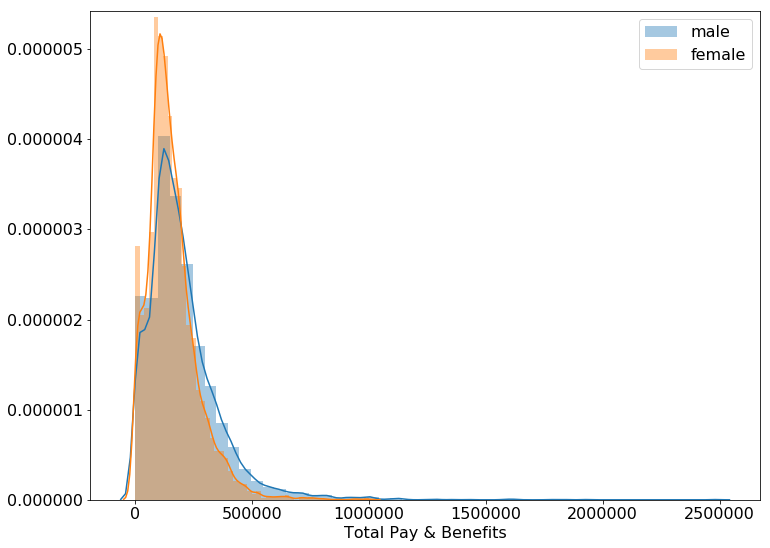

In [32]:
sns.distplot(profs[profs['gender']=='male']['Total Pay & Benefits'], label='male')
sns.distplot(profs[profs['gender']=='female']['Total Pay & Benefits'], label='female')
plt.legend()

In [42]:
title_counts = profs['Job Title'].value_counts()

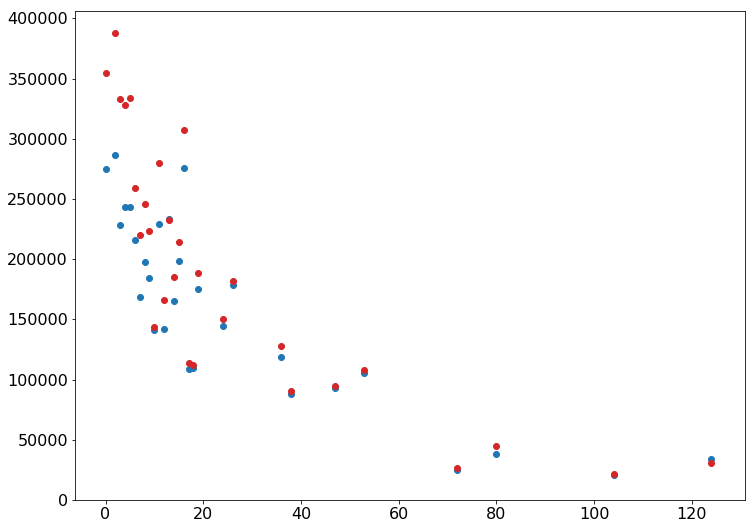

In [45]:
for i, title in enumerate(profs['Job Title'].unique()):
    if title_counts[title] < 100:
        continue
    plt.scatter(i, profs[(profs['Job Title']==title) & (profs['gender']=='female')]['Total Pay'].mean(), c='C0')
    plt.scatter(i, profs[(profs['Job Title']==title) & (profs['gender']=='male')]['Total Pay'].mean(), c='C3')

In [303]:
all_title_data = {}
for title in profs['Job Title'].unique():
    if title_counts[title] < 50:
        continue
    title_data = {}
    title_data['mean_female'] = profs[(profs['gender']=='female') & (profs['Job Title']==title)].mean()['Total Pay & Benefits']
    title_data['mean_male'] = profs[(profs['gender']=='male') & (profs['Job Title']==title)].mean()['Total Pay & Benefits']
    title_data['mean'] = profs[(profs['Job Title']==title)].mean()['Total Pay & Benefits']
    title_data['median_female'] = profs[(profs['gender']=='female') & (profs['Job Title']==title)].median()['Total Pay & Benefits']
    title_data['median_male'] = profs[(profs['gender']=='male') & (profs['Job Title']==title)].median()['Total Pay & Benefits']
    title_data['median'] = profs[(profs['Job Title']==title)].median()['Total Pay & Benefits']
    all_title_data[title] = title_data
title_df = pd.DataFrame.from_dict(all_title_data).T

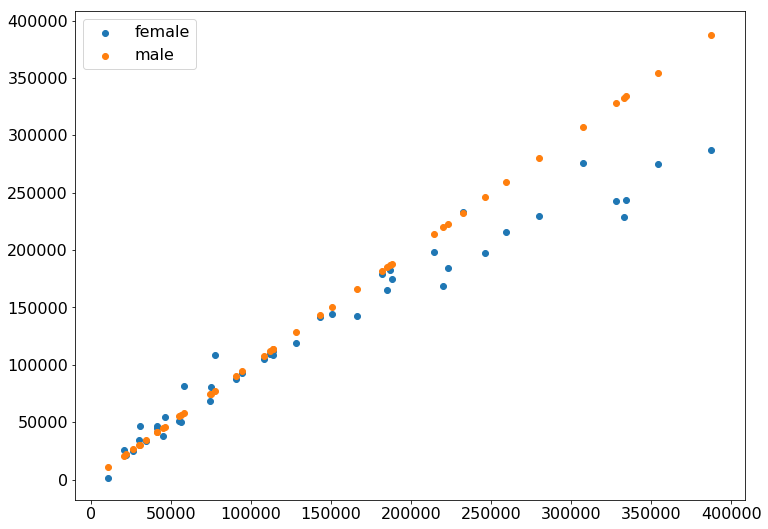

In [304]:
plt.scatter(title_df['mean_male'], title_df.mean_female, label='female')
plt.scatter(title_df['mean_male'], title_df.mean_male, label='male')
plt.legend()

In [162]:
dept_data = pd.read_csv('prof_data_from_rmp.csv', usecols=(1, 2, 3))

In [163]:
dept_data['ordered_name'] = [(' '.join(name.split(',')[::-1]).strip()) for name in dept_data['name']]

In [164]:
merged = dept_data.merge(profs, left_on='ordered_name', right_on='Employee Name')

In [165]:
merged

,department,location,name,ordered_name,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status,gender
0,Mathematics,Santa Barbara,"Cooper, Daryl",Daryl Cooper,Daryl Cooper,PROF-AY,172467.0,0,0,Not Provided,172467.0,172467.0,2016,NaN,University of California,NaN,male
1,Economics,Riverside,"Bandyopadhyay, Taradas",Taradas Bandyopadhyay,Taradas Bandyopadhyay,PROF-AY-B/E/E,140775.0,0,29743,Not Provided,170518.0,170518.0,2016,NaN,University of California,NaN,
2,Mathematics,Davis,"Gravner, Janko",Janko Gravner,Janko Gravner,PROF-AY,129672.0,0,23404,Not Provided,153076.0,153076.0,2016,NaN,University of California,NaN,
3,Economics,Santa Barbara,"Sonstelie, Jon",Jon Sonstelie,Jon Sonstelie,PROF-AY-B/E/E,91278.0,0,0,Not Provided,91278.0,91278.0,2016,NaN,University of California,NaN,male
4,Political Science,Davis,"Nincic, Miroslav",Miroslav Nincic,Miroslav Nincic,PROF-AY,97756.0,0,0,Not Provided,97756.0,97756.0,2016,NaN,University of California,NaN,
5,Chemistry,Irvine,"Potma, Eric",Eric Potma,Eric Potma,PROF-AY,116767.0,0,24686,Not Provided,141453.0,141453.0,2016,NaN,University of California,NaN,male
6,Economics,Irvine,"Glazer, Amihai",Amihai Glazer,Amihai Glazer,PROF-AY-B/E/E,208317.0,0,0,Not Provided,208317.0,208317.0,2016,NaN,University of California,NaN,
7,Economics,Berkeley,"Olney, Martha",Martha Olney,Martha Olney,ADJ PROF-AY-B/E/E,133833.0,0,3948,Not Provided,137781.0,137781.0,2016,NaN,University of California,NaN,female
8,Chemistry,Davis,"Guo, Ting",Ting Guo,Ting Guo,PROF-AY,110930.0,0,26902,Not Provided,137832.0,137832.0,2016,NaN,University of California,NaN,
9,Biology,Berkeley,"Urnov, Fyodor",Fyodor Urnov,Fyodor Urnov,ADJ PROF-AY,12276.0,0,0.00,Not Provided,12276.0,12276.0,2016,NaN,University of California,NaN,


In [166]:
dept_counts = merged['department'].value_counts()

In [279]:
all_dept_data = {}
for dept in merged['department'].unique():
    if isinstance(dept, float):
        continue
    if dept_counts[dept] < 10:
        continue
    dept_data = {}
    dept_data['mean_female'] = merged[(merged['gender']=='female') & (merged['department']==dept)].mean()['Total Pay & Benefits']
    dept_data['mean_male'] = merged[(merged['gender']=='male') & (merged['department']==dept)].mean()['Total Pay & Benefits']
    dept_data['mean'] = merged[(merged['department']==dept) & (merged['gender']!='')].mean()['Total Pay & Benefits']
    dept_data['median_female'] = merged[(merged['gender']=='female') & (merged['department']==dept)].median()['Total Pay & Benefits']
    dept_data['median_male'] = merged[(merged['gender']=='male') & (merged['department']==dept)].median()['Total Pay & Benefits']
    dept_data['median'] = merged[(merged['department']==dept) & (merged['gender']!='')].median()['Total Pay & Benefits']
    all_dept_data[dept] = dept_data
dept_df = pd.DataFrame.from_dict(all_dept_data).T

In [280]:
dept_df = dept_df.dropna()

In [281]:
clean_merged = merged[[dept_counts[dept]>10 if isinstance(dept, str) else False for dept in merged['department']]]
clean_merged = clean_merged[clean_merged['gender'] != '']

In [282]:
mean_pay = clean_merged.groupby('department').median()['Total Pay & Benefits']

In [283]:
mean_pay.sort_values().index.values

array(["Women's Studies", 'Literature', 'Spanish', 'Asian Studies', 'Art',
       'Linguistics', 'Languages', 'English', 'Ethnic Studies',
       'Philosophy', 'Political Science', 'Architecture', 'Art History',
       'Film', 'Classics', 'Fine Arts', 'History', 'Geography',
       'Sociology', 'Music', 'Environmental Science', 'Anthropology',
       'Statistics', 'Biological Sciences', 'Education', 'French',
       'Theater', 'Earth Science', 'Mathematics', 'Bioengineering',
       'Civil Engineering', 'Physics', 'Mechanical Engineering',
       'Psychology', 'Business', 'Biology', 'Economics', 'Rhetoric',
       'Electrical Engineering', 'Comparative Literature', 'Medicine',
       'Engineering', 'Computer Science', 'Public Health',
       'Chemical Engineering', 'Chemistry', 'Materials Science',
       'Communication', 'Management', 'Science', 'Business Administration',
       'Law', 'Legal Studies'], dtype=object)

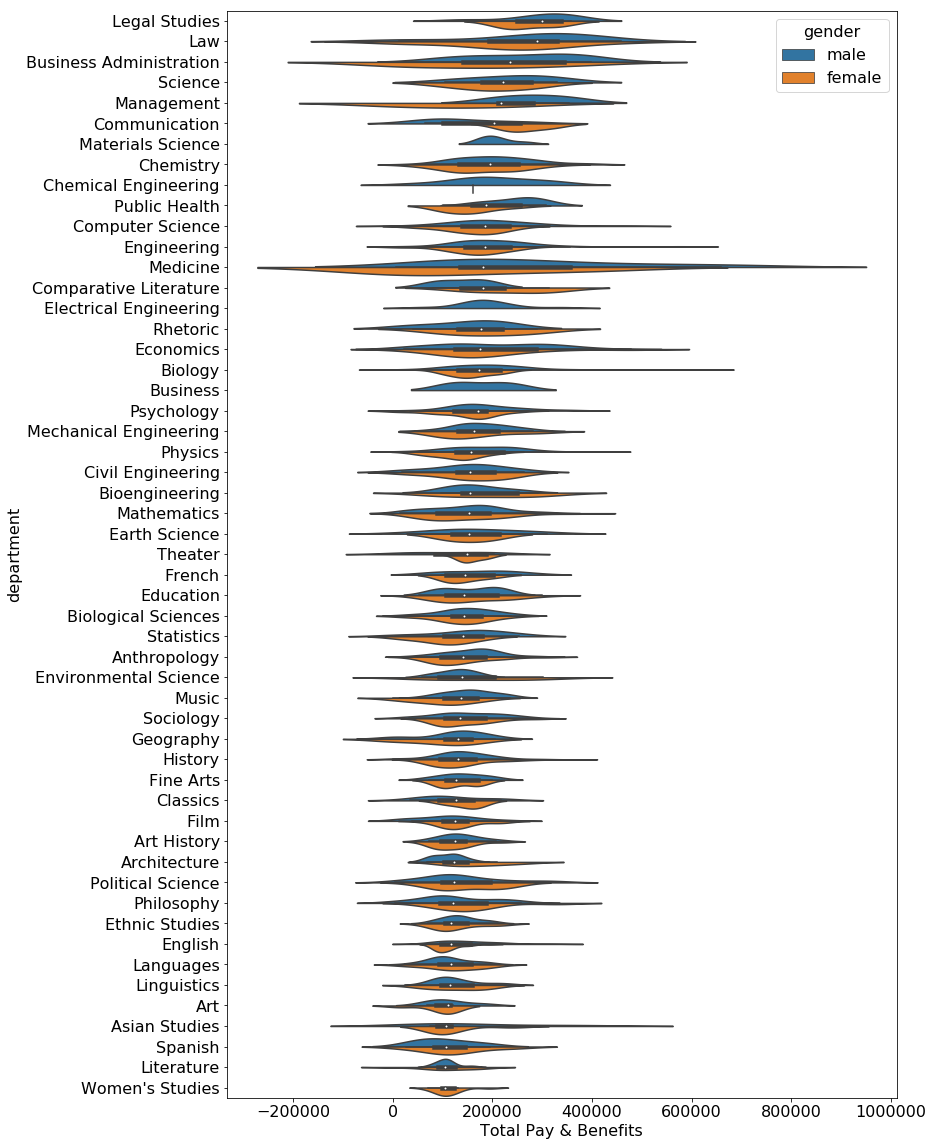

In [284]:
plt.figure(figsize=(12, 20))
sns.violinplot(y="department",
               x="Total Pay & Benefits",
               hue="gender",
               data=clean_merged,
               order=mean_pay.sort_values().index.values[::-1],
               split=True);

In [285]:
gap = (dept_df['mean_male'] - dept_df['mean_female']).sort_values()
print(gap.index.values[::-1])

['Management' 'Medicine' 'Public Health' 'Business Administration'
 'Physics' 'Music' 'Statistics' 'Asian Studies' 'Social Welfare' 'English'
 'Chemical Engineering' 'Computer Science' 'Engineering' 'Law' 'Psychology'
 'Science' 'Biology' 'French' 'Geography' 'Chemistry' 'Anthropology'
 'Legal Studies' 'Economics' 'Art' 'Mechanical Engineering' 'Earth Science'
 'Art History' 'Biological Sciences' 'Sociology' 'Fine Arts'
 'Ethnic Studies' 'Mathematics' 'History' 'Education' 'Linguistics'
 'Literature' 'Civil Engineering' 'Humanities' 'Languages'
 'Political Science' 'Spanish' 'Film' 'Classics' 'Philosophy'
 'Bioengineering' 'Theater' 'Rhetoric' 'Environmental Science'
 'Architecture' 'Comparative Literature' 'Communication']


In [286]:
mean_male_pay = (dept_df['mean_male']).sort_values()
print(mean_male_pay.index.values[::-1])

['Medicine' 'Legal Studies' 'Management' 'Law' 'Business Administration'
 'Public Health' 'Science' 'Chemistry' 'Engineering' 'Economics'
 'Chemical Engineering' 'Computer Science' 'Biology' 'Psychology' 'Physics'
 'Mechanical Engineering' 'French' 'Earth Science' 'Asian Studies'
 'Bioengineering' 'Anthropology' 'Education' 'Music' 'Statistics'
 'Sociology' 'Social Welfare' 'Civil Engineering' 'Biological Sciences'
 'English' 'Rhetoric' 'Mathematics' 'Communication' 'Fine Arts'
 'Comparative Literature' 'Political Science' 'History' 'Ethnic Studies'
 'Art History' 'Environmental Science' 'Linguistics' 'Philosophy'
 'Geography' 'Classics' 'Theater' 'Art' 'Languages' 'Film' 'Humanities'
 'Architecture' 'Literature' 'Spanish']


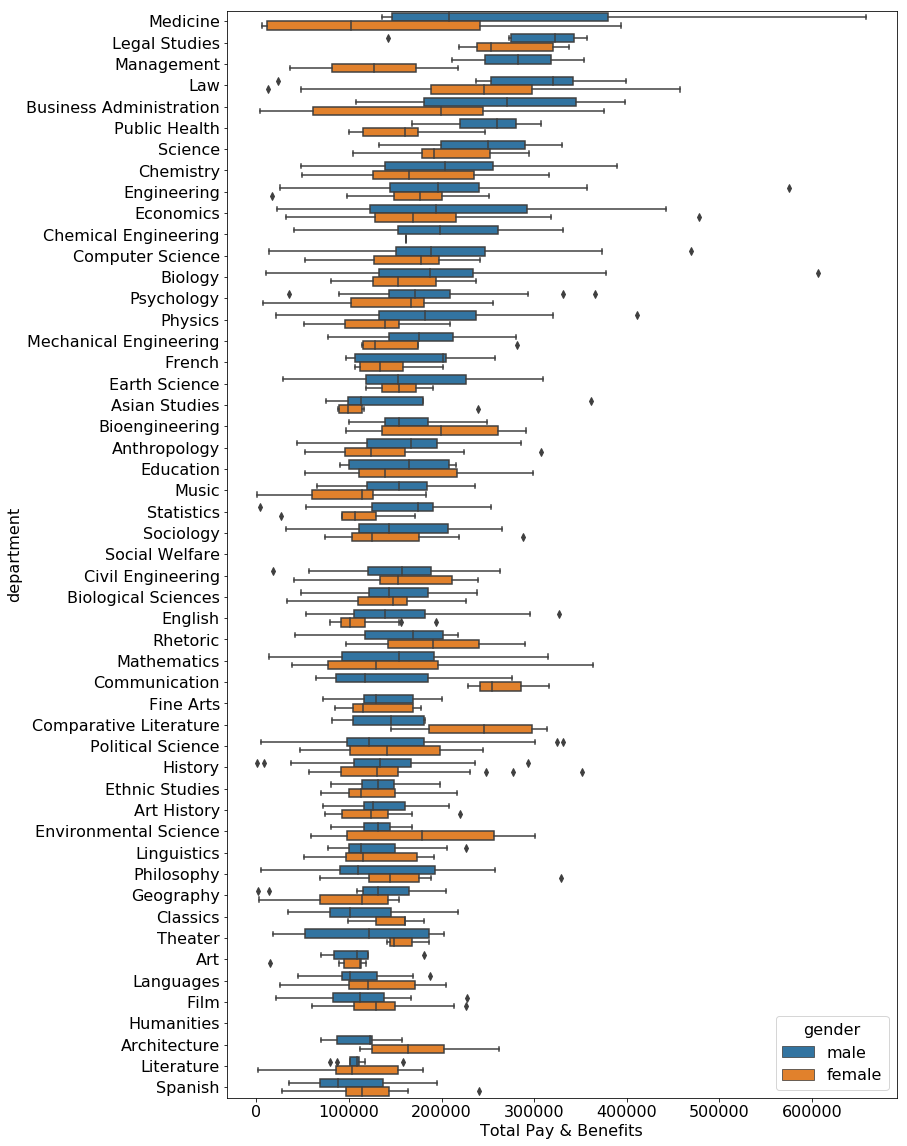

In [287]:
plt.figure(figsize=(12, 20))
sns.boxplot(y="department",
               x="Total Pay & Benefits",
               hue="gender",
               data=clean_merged,
               order=mean_male_pay.index.values[::-1]);

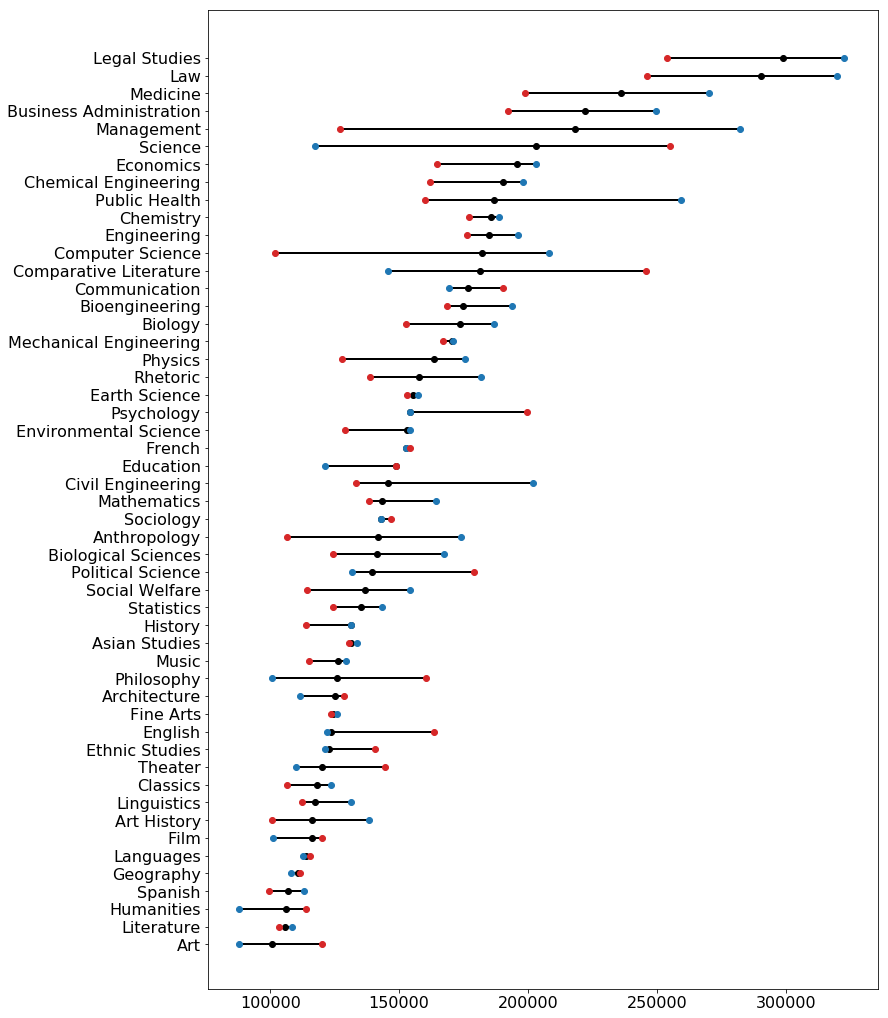

In [288]:
plt.figure(figsize=(12, 18))
for i, kv in enumerate(dept_df.sort_values('median').iterrows()):
    plt.plot([kv[1]['median'], kv[1]['median_male']], [i, i], 'k', linewidth=2)
    plt.plot([kv[1]['median'], kv[1]['median_female']], [i, i], 'k', linewidth=2)
    plt.scatter(kv[1]['median'], i, c='k')
    plt.scatter(kv[1]['median_male'], i, c='C0', zorder=100)
    plt.scatter(kv[1]['median_female'], i, c='C3', zorder=100)
plt.gca().set_yticks(range(len(dept_df.index.values)));
plt.gca().set_yticklabels(dept_df.sort_values('mean').index.values);

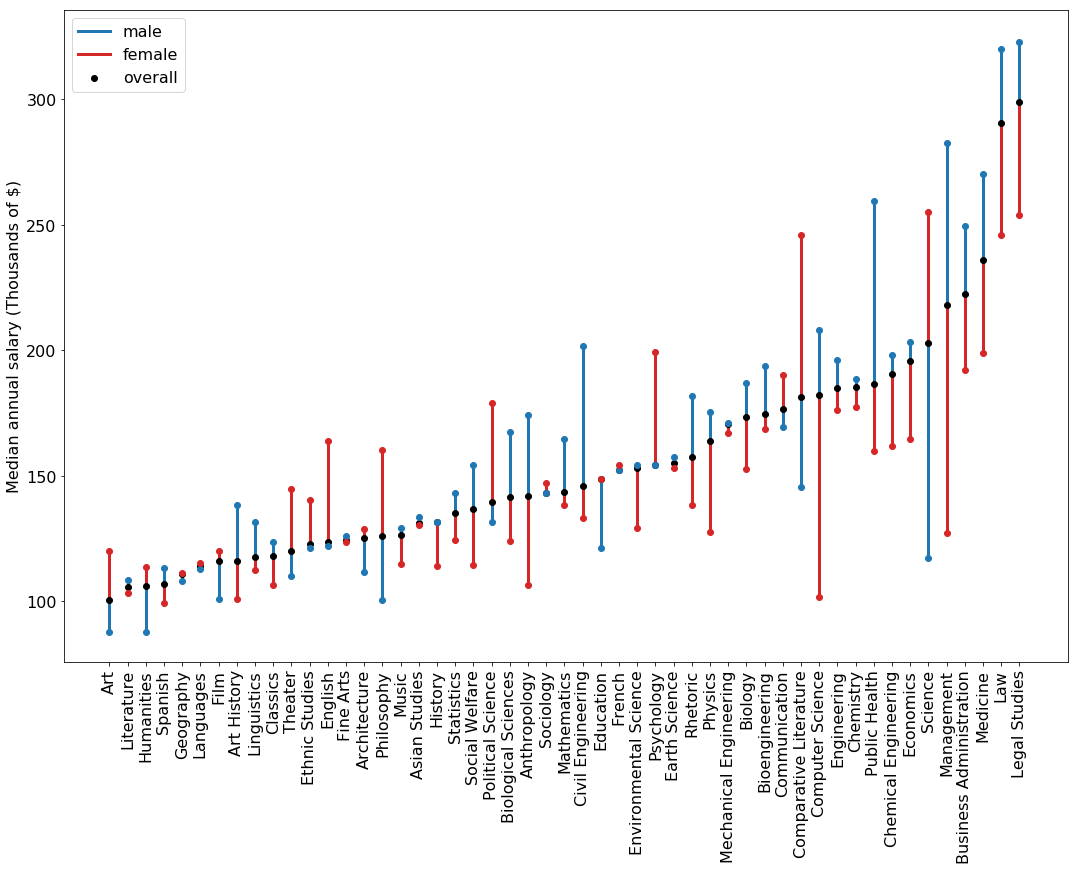

In [301]:
plt.figure(figsize=(18, 12))
for i, kv in enumerate(dept_df.sort_values('median').iterrows()):
    if i == 0:
        plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_male']/1000.], 'C0', linewidth=3, label='male')
        plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_female']/1000.], 'C3', linewidth=3, label='female')
        plt.scatter(i, kv[1]['median']/1000., c='k', zorder=100, label='overall')
    else:
        plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_male']/1000.], 'C0', linewidth=3)
        plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_female']/1000.], 'C3', linewidth=3)
        plt.scatter(i, kv[1]['median']/1000., c='k', zorder=100)
    plt.scatter(i, kv[1]['median_male']/1000., c='C0', zorder=100)
    plt.scatter(i, kv[1]['median_female']/1000., c='C3', zorder=100)
plt.gca().set_xticks(range(len(dept_df.index.values)));
plt.gca().set_xticklabels(dept_df.sort_values('mean').index.values);
plt.xticks(rotation=90)
plt.legend()
plt.ylabel('Median annual salary (Thousands of $)')

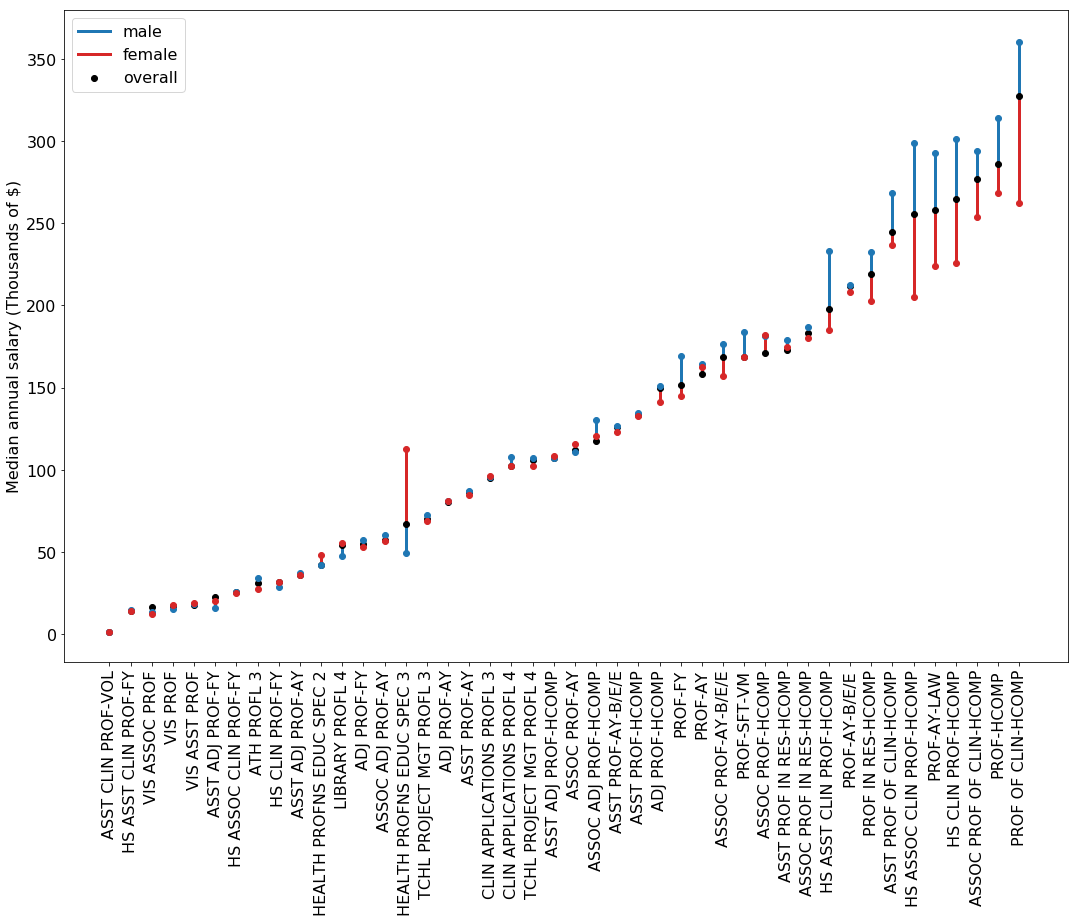

In [305]:
plt.figure(figsize=(18, 12))
for i, kv in enumerate(title_df.sort_values('median').iterrows()):
    if i == 0:
        plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_male']/1000.], 'C0', linewidth=3, label='male')
        plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_female']/1000.], 'C3', linewidth=3, label='female')
        plt.scatter(i, kv[1]['median']/1000., c='k', zorder=100, label='overall')
    else:
        plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_male']/1000.], 'C0', linewidth=3)
        plt.plot([i, i], [kv[1]['median']/1000., kv[1]['median_female']/1000.], 'C3', linewidth=3)
        plt.scatter(i, kv[1]['median']/1000., c='k', zorder=100)
    plt.scatter(i, kv[1]['median_male']/1000., c='C0', zorder=100)
    plt.scatter(i, kv[1]['median_female']/1000., c='C3', zorder=100)
plt.gca().set_xticks(range(len(title_df.index.values)));
plt.gca().set_xticklabels(title_df.sort_values('mean').index.values);
plt.xticks(rotation=90)
plt.legend()
plt.ylabel('Median annual salary (Thousands of $)')

In [306]:
clean_merged

,department,location,name,ordered_name,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status,gender
0,Mathematics,Santa Barbara,"Cooper, Daryl",Daryl Cooper,Daryl Cooper,PROF-AY,172467.0,0,0,Not Provided,172467.0,172467.0,2016,NaN,University of California,NaN,male
3,Economics,Santa Barbara,"Sonstelie, Jon",Jon Sonstelie,Jon Sonstelie,PROF-AY-B/E/E,91278.0,0,0,Not Provided,91278.0,91278.0,2016,NaN,University of California,NaN,male
5,Chemistry,Irvine,"Potma, Eric",Eric Potma,Eric Potma,PROF-AY,116767.0,0,24686,Not Provided,141453.0,141453.0,2016,NaN,University of California,NaN,male
7,Economics,Berkeley,"Olney, Martha",Martha Olney,Martha Olney,ADJ PROF-AY-B/E/E,133833.0,0,3948,Not Provided,137781.0,137781.0,2016,NaN,University of California,NaN,female
10,Anthropology,Santa Barbara,"Walsh, Casey",Casey Walsh,Casey Walsh,ASSOC PROF-AY,101633.0,0,16186,Not Provided,117819.0,117819.0,2016,NaN,University of California,NaN,male
11,Chemistry,Irvine,"Weiss, Gregory Alan",Gregory Alan Weiss,Gregory Alan Weiss,PROF-AY,142442.0,0,45252,Not Provided,187694.0,187694.0,2016,NaN,University of California,NaN,male
12,Psychology,Santa Barbara,"Klein, Stanley",Stanley Klein,Stanley Klein,PROF-AY,142760.0,0,0,Not Provided,142760.0,142760.0,2016,NaN,University of California,NaN,male
15,History,Berkeley,"Einhorn, Robin",Robin Einhorn,Robin Einhorn,PROF-AY,139375.0,0,350,Not Provided,139725.0,139725.0,2016,NaN,University of California,NaN,female
19,Philosophy,Davis,"Sennet, Adam",Adam Sennet,Adam Sennet,ASSOC PROF-AY,99731.0,0,0,Not Provided,99731.0,99731.0,2016,NaN,University of California,NaN,male
20,Biology,Irvine,"Bardwell, Lee",Lee Bardwell,Lee Bardwell,PROF-AY,117042.0,0,13244,Not Provided,130286.0,130286.0,2016,NaN,University of California,NaN,male
